### 3 demos: repacking data from .mat to .hdf5 file format

*Created by:* Helena Peic Tukuljac, February 2020 

*Summary:* This notebook provides methods for data reorganization from .mat files to .h5py

*Data:* Data comes from the simulated and measured impulse responses used in the following publication:
H. P. Tukuljac, V. Pulkki, H. Gamper, K. Godin, I. J. Tashev and N. Raghuvanshi, "A Sparsity Measure for Echo Density Growth in General Environments," ICASSP 2019 - 2019 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Brighton, United Kingdom, 2019, pp. 1-5.
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8682878&isnumber=8682151

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import h5py

In [2]:
VARIABLE_VOLUME_MEASUREMENTS      = 'data/IR/variable_volume_measurements' # taken from public datasets
SIMULATION_SHOEBOX_CLOSED         = 'data/IR/shoebox_phase_1'
SIMULATION_SHOEBOX_ALMOST_CLOSED  = 'data/IR/shoebox_phase_3' # .fbx files were mixed
SIMULATION_SHOEBOX_ALMOST_OPEN    = 'data/IR/shoebox_phase_2'
SIMULATION_SHOEBOX_OPEN           = 'data/IR/shoebox_phase_4'
SIMULATION_POLYBOX_2     = 'data/IR/polybox_2'
SIMULATION_POLYBOX_3     = 'data/IR/polybox_3_1'
SIMULATION_POLYBOX_4     = 'data/IR/polybox_4'

Measurements: Variable volume dataset size:  3


C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


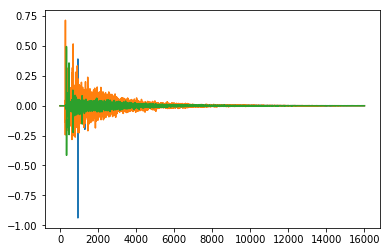

In [3]:
x = loadmat(VARIABLE_VOLUME_MEASUREMENTS)
Fs = np.asscalar(x['Fs'])
dataset_measurement_volume = np.concatenate((np.reshape(x['h'][0,0][0:Fs], (1, Fs)), \
                                            np.reshape(x['h'][0,1][0:Fs], (1, Fs))))
dataset_measurement_volume = np.concatenate((dataset_measurement_volume, \
                                            np.reshape(x['h'][0,2][0:Fs], (1, Fs))))
plt.plot(dataset_measurement_volume[0])
plt.plot(dataset_measurement_volume[1])
plt.plot(dataset_measurement_volume[2])
print('Measurements: Variable volume dataset size: ', len(dataset_measurement_volume))

Simulations: Sliding lid dataset size:  4


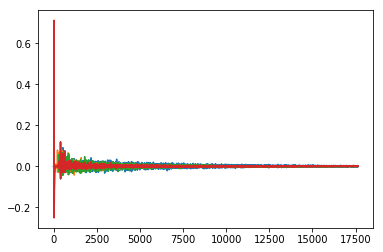

In [4]:
dataset_simulation_sliding_lid = []
x = loadmat(SIMULATION_SHOEBOX_CLOSED)
Fs = 1/x['Timestep']
IR1 = x['ResponseSignals']
x = loadmat(SIMULATION_SHOEBOX_ALMOST_CLOSED)
IR2 = x['ResponseSignals']
x = loadmat(SIMULATION_SHOEBOX_ALMOST_OPEN)
IR3 = x['ResponseSignals']
x = loadmat(SIMULATION_SHOEBOX_OPEN)
IR4 = x['ResponseSignals']
dataset_simulation_sliding_lid = np.concatenate((IR1, IR2))
dataset_simulation_sliding_lid = np.concatenate((dataset_simulation_sliding_lid, \
                                            np.concatenate((IR3, IR4))))
plt.plot(dataset_simulation_sliding_lid[0])
plt.plot(dataset_simulation_sliding_lid[1])
plt.plot(dataset_simulation_sliding_lid[2])
plt.plot(dataset_simulation_sliding_lid[3])
print('Simulations: Sliding lid dataset size: ', len(dataset_simulation_sliding_lid))

Simulations: Polybox dataset size:  3


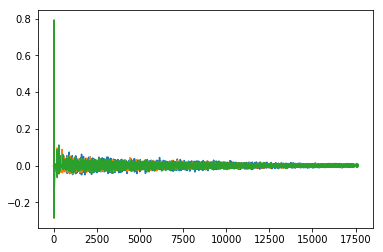

In [5]:
dataset_simulation_polybox = []
x = loadmat(SIMULATION_POLYBOX_2)
Fs = 1/x['Timestep']
IR1 = x['ResponseSignals']
x = loadmat(SIMULATION_POLYBOX_3)
IR2 = x['ResponseSignals']
x = loadmat(SIMULATION_POLYBOX_4)
IR3 = x['ResponseSignals']
dataset_simulation_polybox = np.concatenate((IR1, IR2))
dataset_simulation_polybox = np.concatenate((dataset_simulation_polybox, IR3))
plt.plot(dataset_simulation_polybox[0])
plt.plot(dataset_simulation_polybox[1])
plt.plot(dataset_simulation_polybox[2])
print('Simulations: Polybox dataset size: ', len(dataset_simulation_polybox))

In [6]:
Fs = np.array([5882.35294118, 5882.35294118, 16000])

In [7]:
with h5py.File('data.h5', 'w') as hf:
    hf.create_dataset('Fs', data=Fs)
    hf.create_dataset('dataset_simulation_polybox', data=dataset_simulation_polybox)
    hf.create_dataset('dataset_simulation_sliding_lid', data=dataset_simulation_sliding_lid)
    hf.create_dataset('dataset_measurement_volume', data=dataset_measurement_volume)

In [8]:
with h5py.File('data.h5', 'r') as hf:
    print(hf['Fs'])
    print(hf['dataset_simulation_polybox'])
    print(hf['dataset_simulation_sliding_lid'])
    print(hf['dataset_measurement_volume'])

<HDF5 dataset "Fs": shape (3,), type "<f8">
<HDF5 dataset "dataset_simulation_polybox": shape (3, 17647), type "<f8">
<HDF5 dataset "dataset_simulation_sliding_lid": shape (4, 17647), type "<f8">
<HDF5 dataset "dataset_measurement_volume": shape (3, 16000), type "<f8">
